In [1]:
import numpy as np
import pickle
import multiprocessing as mp
import matplotlib.pyplot as plt
from copy import copy

In [2]:
from numpy import tan, pi, sqrt
from numpy.fft import fft, ifft
from scipy.optimize import minimize, curve_fit
from scipy.constants import e,h,hbar,k,G,epsilon_0
from lmfit import Model, Parameters
phi_0 = hbar/2./e
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import matplotlib as mpl

# Data Load and Plotting

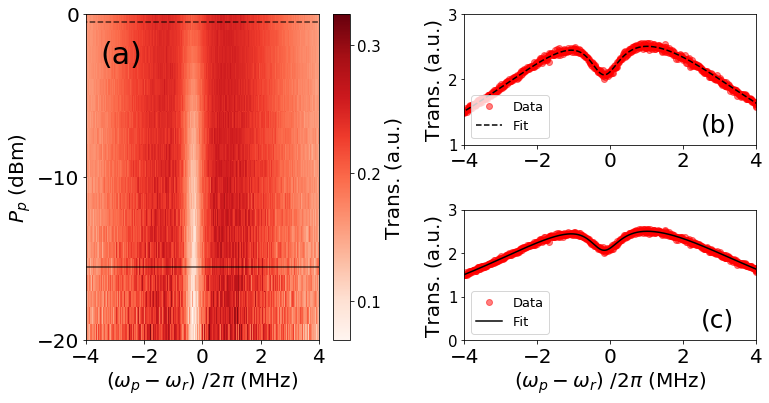

In [3]:
# Data load.
load_file = open('Probe_power_sweep.dat', 'rb')
loaddata = pickle.load(load_file)

load_file_eps = open('calibration_fitting-highpower.dat', 'rb')
loaddata_eps = pickle.load(load_file_eps)

load_file_lin = open('calibration_fitting-highpower.dat', 'rb')
loaddata_lin = pickle.load(load_file_lin)

## Plot.

plt.subplots(2, 2, figsize=(12,6))

grid = plt.GridSpec(2,2, wspace=0.3, hspace=0.5)
plt.subplot(grid[0:, 0])
plt.pcolormesh(loaddata['x'], loaddata['y'], loaddata['z']*1e7, cmap='Reds') # 1e7 is scaling factor.
plt.plot(loaddata['x'],-0.5+np.zeros(len(loaddata['x'])),'k',ls='--',alpha=0.7)
plt.plot(loaddata['x'],-15.5+np.zeros(len(loaddata['x'])),'k',ls='-',alpha=0.7)
plt.xticks([-4, -2, 0, 2, 4],fontsize=20)
plt.yticks([-20, -10, 0],fontsize=20)
plt.xlim([-4,4])
# plt.ylim([-3,3])
plt.ylabel(r"$P_{p}$ (dBm)",fontsize = 20)
plt.xlabel("$(\\omega_p-\\omega_r)$ $/2\\pi$ (MHz)",fontsize = 20)
plt.text(-3.5,-3,'(a)',fontsize=30)
cbar = plt.colorbar()
cbar.set_ticks([0,0.1,0.2,0.3])
cbar.set_label(label = "Trans. (a.u.)", size=20)
cbar.ax.tick_params(labelsize=15) 

plt.subplot(grid[0,1])

plt.plot(loaddata_eps['x']*1e-6-4.0753e3, loaddata_eps['y']*1e8, 'ro', alpha=0.5, label='Data')
plt.plot(loaddata_eps['x']*1e-6-4.0753e3, loaddata_eps['z']*1e8, 'k--', alpha=1,   label='Fit')
plt.xticks([-4, -2, 0, 2, 4],fontsize=20)
plt.yticks([1,2,3],fontsize=15)
plt.xlim([-4,4])
plt.ylim([1,3])
plt.ylabel("Trans. (a.u.)",fontsize = 20)
plt.text(2.5,1.2,'(b)',fontsize=25)
plt.legend(loc=3,fontsize=13)

plt.subplot(grid[1, 1])

plt.plot(loaddata_lin['x']*1e-6-4.0753e3, loaddata_lin['y']*1e8, 'ro', alpha=0.5, label='Data')
plt.plot(loaddata_lin['x']*1e-6-4.0753e3, loaddata_lin['z']*1e8, 'k-', alpha=1,   label='Fit')
plt.xticks([-4, -2, 0, 2, 4],fontsize=20)
plt.yticks([0,1,2,3],fontsize=15)
plt.xlim([-4,4])
plt.ylim([0,3])
plt.ylabel("Trans. (a.u.)",fontsize = 20)
plt.xlabel("$(\\omega_p-\\omega_r)$ $/2\\pi$ (MHz)",fontsize = 20)
plt.text(2.5,0.3,'(c)',fontsize=25)
plt.legend(loc=3,fontsize=13)

plt.show()